In [1]:
import nltk
import re
import glob
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import sys


# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

print("Setup Selesai.")

Setup Selesai.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


*1. PEMUATAN KORPUS*

In [2]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(ROOT_DIR, 'data')

file_paths = sorted(glob.glob(os.path.join(DATA_DIR, 'doc*.txt')))
documents = []
doc_names = []

print(f"Mencari di path: {DATA_DIR}")
print(f"Total dokumen ditemukan: {len(file_paths)}")

for file in file_paths:
    doc_names.append(os.path.basename(file)) 
    
    with open(file, 'r', encoding='utf-8') as f:
        documents.append(f.read())

print("\n--- Sampel Dokumen 01 (Sebelum Preprocessing) ---")
print(f"File: {doc_names[0]}")
print(documents[0])

Mencari di path: c:\stki-uts-A11.2023.14986-IgdoRagilManuel\data
Total dokumen ditemukan: 15

--- Sampel Dokumen 01 (Sebelum Preprocessing) ---
File: doc01_magang_web_smg_tengah.txt
Posisi: Magang (Internship) - Web Developer

Lokasi: WFO di kantor Semarang Tengah (dekat Tugu Muda)

Durasi: 6 bulan

Kualifikasi:

Mahasiswa aktif semester 5.

Berasal dari UDINUS atau UNNES.

Menguasai skill PHP dan Laravel.

Memiliki pengetahuan dasar React.

Tugas Utama: Membantu tim backend.


*2. Soal Nomor 2 Inisialisasi Alat dan Fungsi Clean (Case Folding dan Normalisasi)*

In [ ]:
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# --- Setup Stemmer ---
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 1. Ambil daftar stopwords bawaan NLTK
list_stopwords_dasar = stopwords.words('indonesian')

# 2. Tambahkan daftar stopwords kustom
custom_stopwords = [
    'yg', 'utk', 'dgn', 'jg', 'dg', 'sbb', 'yakni', 'wfo', 'wfh', 
    'di', 'dan', 'atau', 'untuk', 'adalah', 'merupakan', 'pada', 'ke', 'dari',
    'dengan', 'yang', 'ini', 'itu', 'tersebut', 'info'
]

# 3. Gabungkan keduanya ke dalam Set (untuk pencarian lebih cepat)
STOPWORDS_SET = set(list_stopwords_dasar)
STOPWORDS_SET.update(custom_stopwords) 

print(f"Total stopwords: {len(list_stopwords_dasar)} kata.")

# --- 1. Fungsi Clean ---
def clean(text):
    text = text.lower()
    # Hapus karakter selain huruf a-z dan spasi
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("Fungsi clean() siap.")

# --- DEMO OUTPUT ---
print("\n--- Output ---")
sample_text_asli = documents[0] 
print(f"1. ASLI:\n{sample_text_asli}")
sample_cleaned = clean(sample_text_asli)
print(f"\n2. HASIL clean():\n{sample_cleaned}")

Total stopwords: 758 kata.
Fungsi clean() siap.

--- Output ---
1. ASLI:
Posisi: Magang (Internship) - Web Developer

Lokasi: WFO di kantor Semarang Tengah (dekat Tugu Muda)

Durasi: 6 bulan

Kualifikasi:

Mahasiswa aktif semester 5.

Berasal dari UDINUS atau UNNES.

Menguasai skill PHP dan Laravel.

Memiliki pengetahuan dasar React.

Tugas Utama: Membantu tim backend.

2. HASIL clean():
posisi magang internship web developer lokasi wfo di kantor semarang tengah dekat tugu muda durasi bulan kualifikasi mahasiswa aktif semester berasal dari udinus atau unnes menguasai skill php dan laravel memiliki pengetahuan dasar react tugas utama membantu tim backend


*Soal 2 (Langkah B) Tokenisasi*

In [ ]:
# --- Tokenize ---

def tokenize(text):
    return word_tokenize(text)

# --- DEMO OUTPUT ---
print("\n--- Output ---")
# ambil hasil dari sel sebelumnya
print(f"1. INPUT :\n{sample_cleaned}")

#  proses dan simpan hasilnya
sample_tokenized = tokenize(sample_cleaned)
print(f"\n2. HASIL tokenize():\n{sample_tokenized}")


--- Output Nyata (Demo) ---
1. INPUT (dari sel 3.1):
posisi magang internship web developer lokasi wfo di kantor semarang tengah dekat tugu muda durasi bulan kualifikasi mahasiswa aktif semester berasal dari udinus atau unnes menguasai skill php dan laravel memiliki pengetahuan dasar react tugas utama membantu tim backend

2. HASIL tokenize():
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'wfo', 'di', 'kantor', 'semarang', 'tengah', 'dekat', 'tugu', 'muda', 'durasi', 'bulan', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'berasal', 'dari', 'udinus', 'atau', 'unnes', 'menguasai', 'skill', 'php', 'dan', 'laravel', 'memiliki', 'pengetahuan', 'dasar', 'react', 'tugas', 'utama', 'membantu', 'tim', 'backend']


*Soal 2 (Langkah C) Stopword Removal*

In [ ]:
# --- Remove Stopwords ---

# --- 3. Fungsi Remove Stopwords ---
def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords_dasar]

print("Fungsi remove_stopwords() siap.")

# --- OUTPUT ---
print("\n--- Output ---")
# ambil hasil dari sel sebelumnya
print(f"1. INPUT :\n{sample_tokenized}")

# proses dan simpan hasilnya
sample_stopped = remove_stopwords(sample_tokenized)
print(f"\n2. HASIL remove_stopwords():\n{sample_stopped}")

Fungsi remove_stopwords() siap.

--- Output Nyata (Demo) ---
1. INPUT (dari sel 3.2):
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'wfo', 'di', 'kantor', 'semarang', 'tengah', 'dekat', 'tugu', 'muda', 'durasi', 'bulan', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'berasal', 'dari', 'udinus', 'atau', 'unnes', 'menguasai', 'skill', 'php', 'dan', 'laravel', 'memiliki', 'pengetahuan', 'dasar', 'react', 'tugas', 'utama', 'membantu', 'tim', 'backend']

2. HASIL remove_stopwords():
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'wfo', 'kantor', 'semarang', 'tugu', 'muda', 'durasi', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'berasal', 'udinus', 'unnes', 'menguasai', 'skill', 'php', 'laravel', 'memiliki', 'pengetahuan', 'dasar', 'react', 'tugas', 'utama', 'membantu', 'tim', 'backend']


*Soal 2 (Langkah D) Stemming*

In [ ]:
# --- Stem ---

# --- Fungsi Stem  ---
def stem(tokens):
    return [stemmer.stem(word) for word in tokens]

# --- OUTPUT ---
print("\n--- Output ---")
# ambil hasil dari sel sebelumnya
print(f"1. INPUT :\n{sample_stopped}")

# proses dan simpan hasilnya
sample_stemmed = stem(sample_stopped)
print(f"\n2. HASIL stem():\n{sample_stemmed}")


--- Output Nyata (Demo) ---
1. INPUT (dari sel 3.3):
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'wfo', 'kantor', 'semarang', 'tugu', 'muda', 'durasi', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'berasal', 'udinus', 'unnes', 'menguasai', 'skill', 'php', 'laravel', 'memiliki', 'pengetahuan', 'dasar', 'react', 'tugas', 'utama', 'membantu', 'tim', 'backend']

2. HASIL stem():
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'wfo', 'kantor', 'semarang', 'tugu', 'muda', 'durasi', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'asal', 'udinus', 'unnes', 'kuasa', 'skill', 'php', 'laravel', 'milik', 'tahu', 'dasar', 'react', 'tugas', 'utama', 'bantu', 'tim', 'backend']


*Soal 2 Fungsi Gabungan (Wrapper) Preprocessing*

In [ ]:
# --- Fungsi Preprocess Utama ---

def preprocess_text(text): 
    """
    Fungsi utama yang menjalankan semua langkah preprocessing.
    (Sesuai dengan src/preprocess.py)
    """
    
    # 1. Case Folding
    text = text.lower()
    
    # 2. Normalisasi (menghapus angka, tanda baca)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    
    # 3. Tokenisasi (dari NLTK)
    tokens = word_tokenize(text)
    
    # 4. Stopword Removal & Filter Panjang Kata (menggunakan STOPWORDS_SET)
    tokens_without_stopwords = [
        word for word in tokens 
        if word not in STOPWORDS_SET and len(word) > 2
    ] 
    
    # 5. Stemming (menggunakan 'stemmer')
    stemmed_tokens = [stemmer.stem(word) for word in tokens_without_stopwords]
    
    # 6. Hapus token kosong jika ada
    stemmed_tokens = [token for token in stemmed_tokens if token]
    
    return stemmed_tokens

# --- OUTPUT(FUNGSI WRAPPER) ---
print("\n--- Output (Wrapper) ---")


sample_text_asli = documents[0] 
print(f"1. INPUT (Teks Asli):\n{sample_text_asli}")

# Panggil fungsi wrapper-nya
final_tokens_from_wrapper = preprocess_text(sample_text_asli)
print(f"\n2. HASIL preprocess_text() :\n{final_tokens_from_wrapper}")




--- Output Nyata (Demo Wrapper VERSI BARU) ---
1. INPUT (Teks Asli):
Posisi: Magang (Internship) - Web Developer

Lokasi: WFO di kantor Semarang Tengah (dekat Tugu Muda)

Durasi: 6 bulan

Kualifikasi:

Mahasiswa aktif semester 5.

Berasal dari UDINUS atau UNNES.

Menguasai skill PHP dan Laravel.

Memiliki pengetahuan dasar React.

Tugas Utama: Membantu tim backend.

2. HASIL preprocess_text() (VERSI BARU):
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'kantor', 'semarang', 'tugu', 'muda', 'durasi', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'asal', 'udinus', 'unnes', 'kuasa', 'skill', 'php', 'laravel', 'milik', 'tahu', 'dasar', 'react', 'tugas', 'utama', 'bantu', 'tim', 'backend']


*Soal 2 Pemrosesan Seluruh Korpus*

In [ ]:
# --- APLIKASIKAN PREPROCESSING KE SEMUA DOKUMEN ---

print(f"Memulai preprocessing {len(documents)} dokumen...")

processed_corpus = [] 

# Loop semua dokumen 
for doc_text in documents:
    tokens = preprocess_text(doc_text)
    processed_corpus.append(tokens)
    
print(f"Selesai. Berhasil memproses {len(processed_corpus)} dokumen.")
print("\n--- Sampel Hasil (Dokumen 1 setelah proses) ---")
# Tampilkan 20 token pertama dari dokumen pertama
print(processed_corpus[0][:20])

Memulai preprocessing 15 dokumen...
Selesai. Berhasil memproses 15 dokumen.

--- Sampel Hasil (Dokumen 1 setelah proses) ---
['posisi', 'magang', 'internship', 'web', 'developer', 'lokasi', 'kantor', 'semarang', 'tugu', 'muda', 'durasi', 'kualifikasi', 'mahasiswa', 'aktif', 'semester', 'asal', 'udinus', 'unnes', 'kuasa', 'skill']


*Soal 2 Penyimpanan Hasil Preprocessing*

In [ ]:
import os

# --- Simpan Keluaran Akhir ---

# Tentukan path untuk folder 'processed'
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
PROCESSED_DIR = os.path.join(ROOT_DIR, 'data', 'processed')

if not os.path.exists(PROCESSED_DIR):
    os.makedirs(PROCESSED_DIR)
    print(f"Folder '{PROCESSED_DIR}' berhasil dibuat.")
else:
    print(f"Folder '{PROCESSED_DIR}' sudah ada.")

# Tulis log ringkas
log_lines = []

# Loop melalui 15 dokumen yang sudah bersih
for i in range(len(processed_corpus)):
    # Ambil nama file asli, misal: 'doc01_magang_web_smg_tengah.txt'
    original_filename = doc_names[i]
    
    # Ambil token yang sudah bersih
    clean_tokens = processed_corpus[i]
    
    # Gabungkan token kembali menjadi satu string
    clean_text = ' '.join(clean_tokens)
    
    # Buat nama file baru untuk disimpan
    new_filename = os.path.join(PROCESSED_DIR, f"processed_{original_filename}")
    
    # Tulis ke file
    with open(new_filename, 'w', encoding='utf-8') as f:
        f.write(clean_text)
    
    # Catat ke log
    log_lines.append(f"Sukses: '{original_filename}' -> '{new_filename}' | {len(clean_tokens)} tokens.")

# Simpan log ringkas
log_path = os.path.join(PROCESSED_DIR, 'preprocessing_log.txt')
with open(log_path, 'w', encoding='utf-8') as f:
    f.write("--- LOG PREPROCESSING ---\n")
    f.write('\n'.join(log_lines))
print(f"\nBerhasil menyimpan {len(processed_corpus)} file bersih ke 'data/processed/'.")
print(f"Log ringkas disimpan di 'data/processed/preprocessing_log.txt'.")

Folder 'c:\stki-uts-A11.2023.14986-IgdoRagilManuel\data\processed' sudah ada.

Berhasil menyimpan 15 file bersih ke 'data/processed/'.
Log ringkas disimpan di 'data/processed/preprocessing_log.txt'.


*Soal 2 Analisis dan Uji 10 Token Paling Sering*


--- Uji Opsional: 10 Token Paling Sering (Semua Dokumen) ---

Dokumen: doc01_magang_web_smg_tengah.txt
[('posisi', 1), ('magang', 1), ('internship', 1), ('web', 1), ('developer', 1), ('lokasi', 1), ('kantor', 1), ('semarang', 1), ('tugu', 1), ('muda', 1)]

Dokumen: doc02_magang_data_remote_smg.txt
[('data', 2), ('lokasi', 2), ('skill', 2), ('wajib', 2), ('posisi', 1), ('magang', 1), ('analyst', 1), ('remote', 1), ('terang', 1), ('usaha', 1)]

Dokumen: doc03_magang_uiux_smg_barat.txt
[('aplikasi', 2), ('mobile', 2), ('posisi', 1), ('magang', 1), ('designer', 1), ('lokasi', 1), ('semarang', 1), ('barat', 1), ('area', 1), ('ngaliyan', 1)]

Dokumen: doc04_magang_marketing_simpanglima.txt
[('posisi', 1), ('internship', 1), ('digital', 1), ('marketing', 1), ('lokasi', 1), ('kantor', 1), ('area', 1), ('simpang', 1), ('semarang', 1), ('kualifikasi', 1)]

Dokumen: doc05_magang_akuntansi_smg.txt
[('akuntansi', 2), ('bantu', 2), ('posisi', 1), ('magang', 1), ('lokasi', 1), ('kantor', 1), ('semar

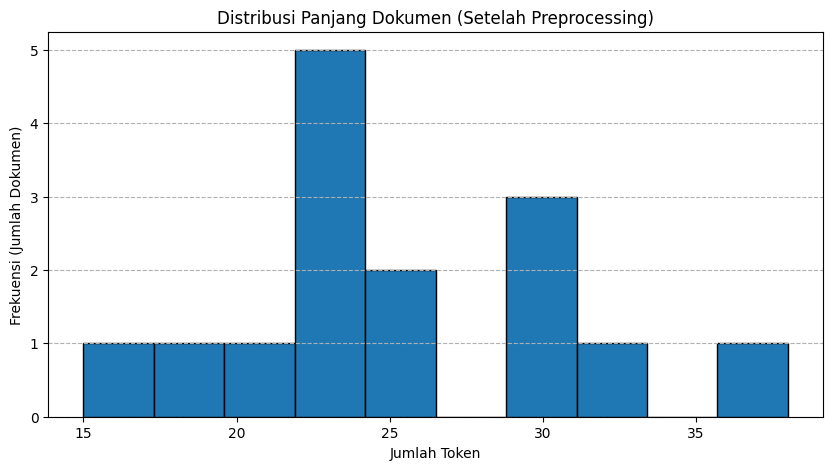

Panjang dokumen (min): 15 tokens
Panjang dokumen (max): 38 tokens
Panjang dokumen (rata-rata): 25.40 tokens


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# --- UJI OPSIONAL ---

print("\n--- Uji Opsional: 10 Token Paling Sering (Semua Dokumen) ---")

# Loop melalui setiap dokumen
for i in range(len(doc_names)):
    doc_name = doc_names[i]
    tokens_list = processed_corpus[i] # Ambil list token untuk dokumen ke-i
    
    # Hitung frekuensi token
    token_counts = Counter(tokens_list)
    
    # Ambil 10 token paling sering
    top_10 = token_counts.most_common(10)
    
    # Cetak hasilnya
    print(f"\nDokumen: {doc_name}")
    print(top_10)


# --- Grafik Distribusi Panjang Dokumen ---
print("\n--- Uji Distribusi Panjang Dokumen (Jumlah Token) ---")
lengths = [len(tokens) for tokens in processed_corpus]

plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=10, edgecolor='black')
plt.title('Distribusi Panjang Dokumen (Setelah Preprocessing)')
plt.xlabel('Jumlah Token')
plt.ylabel('Frekuensi (Jumlah Dokumen)')
plt.grid(axis='y', linestyle='--')
plt.show()

print(f"Panjang dokumen (min): {min(lengths)} tokens")
print(f"Panjang dokumen (max): {max(lengths)} tokens")
print(f"Panjang dokumen (rata-rata): {sum(lengths)/len(lengths):.2f} tokens")

*Soal 3 Pembuatan Indeks Model Boolean*

In [ ]:
import scipy.sparse as sp
import pandas as pd

# --- MEMBANGUN INDEX ---

# --- Bangun Vocabulary ---
# ambil semua term unik dari 15 dokumen
vocabulary = set()
for tokens in processed_corpus:
    vocabulary.update(tokens)

# Urutkan vocabulary agar konsisten
sorted_vocabulary = sorted(list(vocabulary))

# Buat mapping term -> index (untuk baris matrix)
term_to_idx = {term: i for i, term in enumerate(sorted_vocabulary)}

# Buat mapping doc_name -> index (untuk kolom matrix)
doc_to_idx = {doc_name: i for i, doc_name in enumerate(doc_names)}

print(f"Vocabulary berhasil dibangun. Total {len(sorted_vocabulary)} term unik.")

# --- Bangun Incidence Matrix (Sparse) ---
incidence_matrix = sp.lil_matrix((len(sorted_vocabulary), len(doc_names)), dtype=int)

# --- Bangun Inverted Index ---
inverted_index = {} 

for doc_index, tokens in enumerate(processed_corpus):
    doc_name = doc_names[doc_index]
    col_idx = doc_to_idx[doc_name] # Index kolom untuk matrix
    
    for term in tokens:
        # 1. Isi Inverted Index
        if term not in inverted_index:
            inverted_index[term] = set()
        inverted_index[term].add(doc_name)
        
        # 2. Isi Incidence Matrix
        row_idx = term_to_idx[term]
        incidence_matrix[row_idx, col_idx] = 1 # Set 1 jika term ada di dokumen

# Ubah ke CSR (Compressed Sparse Row) untuk penyimpanan/tampilan yg efisien
incidence_matrix = incidence_matrix.tocsr()

print("Inverted Index berhasil dibuat.")
print("Incidence Matrix (Sparse) berhasil dibuat.")
print(f"Ukuran Matrix: {incidence_matrix.shape} (Term x Dokumen)")
print(f"Jumlah nilai non-zero (angka 1): {incidence_matrix.nnz}")

# --- Tampilkan sampel Incidence Matrix ---
print("\n--- Sampel Incidence Matrix (Sparse) ---")
# Tampilkan 10 term pertama vs 5 dokumen pertama
# Kita konversi ke DataFrame agar mudah dibaca
df_incidence = pd.DataFrame.sparse.from_spmatrix(
    incidence_matrix[:10, :5], 
    index=sorted_vocabulary[:10], 
    columns=doc_names[:5]
)
print(df_incidence)

# --- Tampilkan sampel Inverted Index ---
print("\n--- Sampel Inverted Index ---")
print(f"Token 'magang' ada di dokumen: \n{inverted_index.get('magang', 'Tidak ditemukan')}")

Vocabulary berhasil dibangun. Total 180 term unik.
Inverted Index berhasil dibuat.
Incidence Matrix (Sparse) berhasil dibuat.
Ukuran Matrix: (180, 15) (Term x Dokumen)
Jumlah nilai non-zero (angka 1): 344

--- Sampel Incidence Matrix (Sparse) ---
              doc01_magang_web_smg_tengah.txt  \
admin                                       0   
administrasi                                0   
ads                                         0   
ajar                                        0   
aktif                                       1   
akuntansi                                   0   
alam                                        0   
alun                                        0   
anak                                        0   
analyst                                     0   

              doc02_magang_data_remote_smg.txt  \
admin                                        0   
administrasi                                 0   
ads                                          0   
ajar         

*Soal 3 Parser Kueri Boolean*

In [12]:
def get_postings(term):
    """Helper function untuk mengambil postings."""
    # Kueri pengguna juga harus di-stem
    clean_term = stemmer.stem(term.lower())
    
    # Ambil dari inverted index
    return inverted_index.get(clean_term, set())

def parse_boolean_query(query):
    """
    Parser sederhana untuk kueri Boolean.
    Contoh: 
    'magang'
    'magang AND semarang'
    'magang OR tembalang'
    'magang AND semarang NOT kendal' (diproses dari kiri ke kanan)
    """
    
    query_tokens = query.split()
    
    # Jika hanya satu kata
    if len(query_tokens) == 1:
        return get_postings(query_tokens[0])
    
    # Ambil hasil awal (postings dari term pertama)
    current_result_set = get_postings(query_tokens[0])
    
    # Loop 3-an (operator, term)
    i = 1
    while i < len(query_tokens):
        operator = query_tokens[i].upper()
        next_term = query_tokens[i+1]
        next_term_postings = get_postings(next_term)
        
        if operator == 'AND':
            current_result_set = current_result_set.intersection(next_term_postings)
        elif operator == 'OR':
            current_result_set = current_result_set.union(next_term_postings)
        elif operator == 'NOT':
            # 'NOT' berarti 'dan bukan'. A NOT B = A.difference(B)
            current_result_set = current_result_set.difference(next_term_postings)
        else:
            print(f"Operator '{operator}' tidak dikenal.")
            return set()
        
        i += 2 # Lompat ke operator berikutnya
        
    return current_result_set

print("Fungsi parse_boolean_query() siap.")

Fungsi parse_boolean_query() siap.


*Soal 3 Pengujian dan Evaluasi Model Boolean*

In [ ]:
# --- Pengujian Model Boolean ---
print("--- PENGUJIAN MODEL BOOLEAN ---")

# Kueri 1 (AND)
query1 = "magang AND semarang"
results1 = parse_boolean_query(query1)
print(f"\nHASIL Kueri '{query1}': ({len(results1)} dokumen)")
print(results1)

# Kueri 2 (AND)
query2 = "kopi AND tembalang"
results2 = parse_boolean_query(query2)
print(f"\nHASIL Kueri '{query2}': ({len(results2)} dokumen)")
print(results2)

# Kueri 3 (AND NOT)
query3 = "magang AND semarang NOT kendal"
results3 = parse_boolean_query(query3)
print(f"\nHASIL Kueri '{query3}': ({len(results3)} dokumen)")
print(results3)

# Uji: Precision/Recall Sederhana ---
print("\n\n--- UJI Precision/Recall ---")

# Tentukan Gold Set (Kunci Jawaban)
gold_set_q1 = {'doc01_magang_web_smg_tengah.txt', 
               'doc02_magang_data_remote_smg.txt',
               'doc03_magang_uiux_smg_barat.txt',
               'doc04_magang_marketing_simpanglima.txt',
               'doc05_magang_akuntansi_smg.txt',
               'doc13_magang_pabrik_kendal.txt'} # Semua magang yg ada kata semarang
gold_set_q2 = {'doc06_part_time_kopi_tembalang.txt'} # Kopi AND Tembalang
gold_set_q3 = {'doc01_magang_web_smg_tengah.txt', 
               'doc02_magang_data_remote_smg.txt',
               'doc03_magang_uiux_smg_barat.txt',
               'doc04_magang_marketing_simpanglima.txt',
               'doc05_magang_akuntansi_smg.txt'} # Magang di Semarang, TAPI BUKAN Kendal


# 3. Hitung Metrik
def calculate_metrics(retrieved, relevant):
    if not retrieved and not relevant:
        return 1.0, 1.0 # Kasus kosong
    
    true_positives = retrieved.intersection(relevant)
    
    precision = len(true_positives) / len(retrieved) if retrieved else 0.0
    recall = len(true_positives) / len(relevant) if relevant else 0.0
    
    return precision, recall

# Hitung untuk Kueri 1
p1, r1 = calculate_metrics(results1, gold_set_q1)
print(f"\nKueri: '{query1}'")
print(f"  - Hasil (Sistem): {len(results1)} docs, Relevan (Gold): {len(gold_set_q1)} docs")
print(f"  - Precision: {p1:.2f}, Recall: {r1:.2f}")

# Hitung untuk Kueri 2
p2, r2 = calculate_metrics(results2, gold_set_q2)
print(f"\nKueri: '{query2}'")
print(f"  - Hasil (Sistem): {len(results2)} docs, Relevan (Gold): {len(gold_set_q2)} docs")
print(f"  - Precision: {p2:.2f}, Recall: {r2:.2f}")

# Hitung untuk Kueri 3
p3, r3 = calculate_metrics(results3, gold_set_q3)
print(f"\nKueri: '{query3}'")
print(f"  - Hasil (Sistem): {len(results3)} docs, Relevan (Gold): {len(gold_set_q3)} docs")
print(f"  - Precision: {p3:.2f}, Recall: {p3:.2f}")

--- PENGUJIAN MODEL BOOLEAN ---

HASIL Kueri 'magang AND semarang': (4 dokumen)
{'doc03_magang_uiux_smg_barat.txt', 'doc02_magang_data_remote_smg.txt', 'doc01_magang_web_smg_tengah.txt', 'doc05_magang_akuntansi_smg.txt'}

HASIL Kueri 'kopi AND tembalang': (1 dokumen)
{'doc06_part_time_kopi_tembalang.txt'}

HASIL Kueri 'magang AND semarang NOT kendal': (4 dokumen)
{'doc05_magang_akuntansi_smg.txt', 'doc03_magang_uiux_smg_barat.txt', 'doc02_magang_data_remote_smg.txt', 'doc01_magang_web_smg_tengah.txt'}


--- UJI Precision/Recall ---

Kueri: 'magang AND semarang'
  - Hasil (Sistem): 4 docs, Relevan (Gold): 6 docs
  - Precision: 1.00, Recall: 0.67

Kueri: 'kopi AND tembalang'
  - Hasil (Sistem): 1 docs, Relevan (Gold): 1 docs
  - Precision: 1.00, Recall: 1.00

Kueri: 'magang AND semarang NOT kendal'
  - Hasil (Sistem): 4 docs, Relevan (Gold): 5 docs
  - Precision: 1.00, Recall: 1.00


*Soal 4 Pembuatan Matriks TF-IDF(Vector Space Model (VSM))*

In [ ]:
# --- VECTOR SPACE MODEL (VSM) ---

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# --- 1. Persiapan Data untuk TfidfVectorizer ---
# TfidfVectorizer butuh teks mentah (bukan token)
# buat ulang 'processed_corpus' tapi sebagai list of string
processed_corpus_text = []

for tokens in processed_corpus:
    # Gabungkan kembali list token menjadi satu string
    processed_corpus_text.append(' '.join(tokens))

# --- 2. Membuat TF-IDF Matriks Dokumen ---
# TfidfVectorizer() otomatis menghitung TF, DF, IDF dan membuat matriks sparse
vectorizer = TfidfVectorizer()
tfidf_matrix_docs = vectorizer.fit_transform(processed_corpus_text)

# 'tfidf_matrix_docs' adalah representasi Vektor dari 15 dokumen 
# 'vectorizer' sekarang sudah "belajar" vocabulary dari data 

print("TfidfVectorizer & TF-IDF Matrix (Dokumen) siap.")
print(f"Ukuran Matriks TF-IDF: {tfidf_matrix_docs.shape}")
print("(Baris: Dokumen, Kolom: Term Unik)")

TfidfVectorizer & TF-IDF Matrix (Dokumen) siap.
Ukuran Matriks TF-IDF: (15, 180)
(Baris: Dokumen, Kolom: Term Unik)


*Soal 4 Implementasi Pencarian VSM dan Rangking*

In [ ]:
def search_vsm(query, k=5):
    """
    Menerima kueri mentah, mem-preprocessing,
    menghitung cosine similarity, dan mengembalikan top-k hasil.
    """
    
    # 1. Preprocess Kueri Pengguna
    # gunakan fungsi preprocess_text 
    clean_tokens = preprocess_text(query)
    clean_query = ' '.join(clean_tokens)
    
    if not clean_query:
        print("Kueri tidak valid setelah preprocessing.")
        return []
    
    # 2. Representasi Kueri sebagai Vektor TF-IDF
    query_vector = vectorizer.transform([clean_query])
    
    # 3. Hitung Cosine Similarity
    # Menghitung kemiripan antara 1 vektor kueri dengan 15 vektor dokumen
    cosine_scores = cosine_similarity(query_vector, tfidf_matrix_docs).flatten()
    
    # 4. Ambil Top-k Dokumen
    # argsort() mengurutkan dari kecil ke besar, jadi kita ambil k terakhir
    top_k_indices = cosine_scores.argsort()[-k:][::-1] # [::-1] untuk balik urutan
    
    # 5. Format Hasil
    results = []
    for index in top_k_indices:
        doc_name = doc_names[index]
        score = cosine_scores[index]
        # Ambil 120 karakter pertama dari dokumen ASLI
        snippet = documents[index][:120] + "..." 
        
        # Hanya tampilkan hasil jika skor > 0
        if score > 0.0:
            results.append((doc_name, score, snippet))
            
    return results

print("Fungsi search_vsm() siap.")

# --- OUTPUT ---

print("\n--- Output (VSM) ---")

# gunakan kueri "fuzzy" yang tidak bisa dijawab Boolean
demo_query = "magang it semester 5 di semarang"
print(f"1. Kueri:\n{demo_query}")

# panggil fungsinya
demo_results = search_vsm(demo_query, k=3) # Ambil top 3

print(f"\n2. HASIL search_vsm(): (Top 3)")
for doc, score, snippet in demo_results:
    print(f"  - {doc} | Skor Cosine: {score:.4f}")
    print(f"    Snippet: {snippet}\n")

Fungsi search_vsm() siap.

--- Output Nyata (Demo VSM) ---
1. DEMO Kueri:
magang it semester 5 di semarang

2. HASIL search_vsm(): (Top 3)
  - doc01_magang_web_smg_tengah.txt | Skor Cosine: 0.2602
    Snippet: Posisi: Magang (Internship) - Web Developer

Lokasi: WFO di kantor Semarang Tengah (dekat Tugu Muda)

Durasi: 6 bulan

K...

  - doc02_magang_data_remote_smg.txt | Skor Cosine: 0.2416
    Snippet: Posisi: Magang - Data Analyst

Lokasi: Remote (WFH)

Keterangan Lokasi: Perusahaan berbasis di Semarang

Kualifikasi:

M...

  - doc05_magang_akuntansi_smg.txt | Skor Cosine: 0.1100
    Snippet: Posisi: Magang - Akuntansi

Lokasi: Kantor WFO Semarang

Durasi: 4 bulan

Kualifikasi:

Mahasiswa (jurusan Akuntansi ata...



*Soal 4 Pengujian Model VSM dengan kueri bebas*

In [16]:

print("--- PENGUJIAN MODEL VSM ---")

# Kueri 1 (Fuzzy/Konsep)
query_vsm_1 = "kerjaan IT di tembalang"
results_vsm_1 = search_vsm(query_vsm_1, k=3) # Ambil top 3

print(f"\nHASIL Kueri: '{query_vsm_1}' (Top 3)")
for doc, score, snippet in results_vsm_1:
    print(f"  - {doc} | Skor Cosine: {score:.4f}")
    print(f"    Snippet: {snippet}\n")


# Kueri 2 (Fuzzy/Konsep)
query_vsm_2 = "lowongan buat mahasiswa di tembalang"
results_vsm_2 = search_vsm(query_vsm_2, k=3)

print(f"\nHASIL Kueri: '{query_vsm_2}' (Top 3)")
for doc, score, snippet in results_vsm_2:
    print(f"  - {doc} | Skor Cosine: {score:.4f}")
    print(f"    Snippet: {snippet}\n")

# Kueri 3 (Fuzzy/Konsep)
query_vsm_3 = "kerja Data Analyst di semarang"
results_vsm_3 = search_vsm(query_vsm_3, k=3)

print(f"\nHASIL Kueri: '{query_vsm_3}' (Top 3)")
for doc, score, snippet in results_vsm_3:
    print(f"  - {doc} | Skor Cosine: {score:.4f}")
    print(f"    Snippet: {snippet}\n")

--- PENGUJIAN MODEL VSM ---

HASIL Kueri: 'kerjaan IT di tembalang' (Top 3)
  - doc06_part_time_kopi_tembalang.txt | Skor Cosine: 0.2639
    Snippet: Posisi: Part-time Barista Kopi

Lokasi: Kedai Kopi baru di Tembalang (area kampus Undip)

Jam Kerja: Shift malam

Gaji: ...

  - doc14_part_time_kopi_ungaran.txt | Skor Cosine: 0.1409
    Snippet: Lowongan Part-time Barista. Lokasi: Kedai Kopi di Alun-alun Ungaran. Dicari anak muda. Gaji harian. Kerja shift.Posisi: ...

  - doc09_fulltime_web_smg.txt | Skor Cosine: 0.0955
    Snippet: Posisi: Full-time Senior Web Developer

Lokasi: WFO Semarang

Gaji: Gaji UMR dan bonus

Kualifikasi:

Lulusan S1 Informa...


HASIL Kueri: 'lowongan buat mahasiswa di tembalang' (Top 3)
  - doc06_part_time_kopi_tembalang.txt | Skor Cosine: 0.1826
    Snippet: Posisi: Part-time Barista Kopi

Lokasi: Kedai Kopi baru di Tembalang (area kampus Undip)

Jam Kerja: Shift malam

Gaji: ...

  - doc14_part_time_kopi_ungaran.txt | Skor Cosine: 0.0905
    Snippet: Lowon

*Soal 5 Perbandingan Skema Pembobotan (Term Weighting)*

In [ ]:
# --- Membuat 2 Model VSM ---

from sklearn.feature_extraction.text import TfidfVectorizer

# 1. MODEL A: TF-IDF Standar 
vectorizer_A = TfidfVectorizer()
tfidf_matrix_docs_A = vectorizer_A.fit_transform(processed_corpus_text)

# 2. MODEL B: TF-IDF Sublinear (Menggunakan Sublinear Term Frequency)
# Sublinear TF: TF = 1 + log(TF), yang membantu mencegah istilah yang sangat sering 
# mendominasi skor.
vectorizer_B = TfidfVectorizer(sublinear_tf=True)
tfidf_matrix_docs_B = vectorizer_B.fit_transform(processed_corpus_text)

print("Berhasil membuat Model A (Standar) dan Model B (Sublinear TF).")

Berhasil membuat Model A (Standar) dan Model B (Sublinear TF).


*Soal 5 Fungsi Metrik Evaluasi Rangking*

In [ ]:
def calculate_precision_at_k(retrieved_list, gold_set, k):
    """
    Menghitung Precision@k (P@k).
    Menerima: list hasil terurut, set dokumen relevan (gold set), dan nilai k.
    """
    if not retrieved_list:
        return 0.0
        
    retrieved_at_k = retrieved_list[:k]
    relevant_retrieved = 0
    
    for doc_name in retrieved_at_k:
        if doc_name in gold_set:
            relevant_retrieved += 1
            
    return relevant_retrieved / k

def calculate_average_precision(retrieved_list, gold_set):
    """
    Menghitung Average Precision (AP) untuk satu kueri.
    """
    relevant_retrieved_count = 0
    precision_sum = 0.0
    
    for i, doc_name in enumerate(retrieved_list):
        if doc_name in gold_set:
            relevant_retrieved_count += 1
            precision = relevant_retrieved_count / (i + 1)
            precision_sum += precision
            
    # Jika tidak ada dokumen relevan yang ditemukan, AP adalah 0
    if relevant_retrieved_count == 0:
        return 0.0
        
    # AP = sum(P@i) / jumlah_dokumen_relevan_di_gold_set
    return precision_sum / len(gold_set)

def calculate_map_at_k(results_dict, gold_set_dict, k):
    """
    Menghitung Mean Average Precision (MAP@k) untuk beberapa kueri.
    Menerima: 
        - results_dict: {query_name: [doc_name1, doc_name2, ...]}
        - gold_set_dict: {query_name: {doc_nameA, doc_nameB, ...}}
    """
    total_ap = 0.0
    
    for query_name, retrieved_list in results_dict.items():
        gold_set = gold_set_dict.get(query_name, set())
        
        # Potong hasil hanya sampai k
        retrieved_at_k = retrieved_list[:k]
        
        # Hitung AP untuk kueri ini
        ap = calculate_average_precision(retrieved_at_k, gold_set)
        total_ap += ap
        
    # MAP adalah rata-rata AP
    return total_ap / len(results_dict)

print("Fungsi P@k dan MAP@k siap.")

Fungsi P@k dan MAP@k siap.


*Soal 5 Evaluasi Akhir dan Perbandingan Model*

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- EVALUASI ---

def calculate_precision_at_k(retrieved_list, gold_set, k):
    """Menghitung P@k."""
    if not retrieved_list: return 0.0
    retrieved_at_k = retrieved_list[:k]
    relevant_retrieved = sum(1 for doc_name in retrieved_at_k if doc_name in gold_set)
    return relevant_retrieved / k

def calculate_average_precision(retrieved_list, gold_set):
    """Menghitung Average Precision (AP) untuk satu kueri."""
    relevant_retrieved_count = 0
    precision_sum = 0.0
    
    for i, doc_name in enumerate(retrieved_list):
        if doc_name in gold_set:
            relevant_retrieved_count += 1
            precision_sum += relevant_retrieved_count / (i + 1)
            
    if relevant_retrieved_count == 0 or not gold_set:
        return 0.0
        
    return precision_sum / len(gold_set)

def calculate_nDCG(retrieved_list, gold_set, k):
    """Menghitung nDCG@k (Telah diperbaiki untuk NumPy 2.0)."""
    
    def dcg_at_k(rel, k):
        rel = np.asarray(rel, dtype=float)[:k]
        
        if rel.size:
            return np.sum((2**rel - 1) / np.log2(np.arange(2, rel.size + 2)))
        return 0.
    
    def idcg_at_k(rel, k):
        rel_sorted = np.sort(rel)[::-1]
        return dcg_at_k(rel_sorted, k)

    # Buat vektor relevansi
    relevance = [1 if doc in gold_set else 0 for doc in retrieved_list[:k]]
    
    dcg = dcg_at_k(relevance, k)
    idcg = idcg_at_k([1] * len(gold_set), k) # IDCG ideal
    
    if idcg == 0:
        return 0.0 # Hindari pembagian dengan nol
    return dcg / idcg


# --- UJI & PERBANDINGAN ---

# Tentukan Gold Set 
gold_sets = {
    "magang AND semarang": {'doc01_magang_web_smg_tengah.txt', 'doc02_magang_data_remote_smg.txt', 'doc03_magang_uiux_smg_barat.txt', 'doc04_magang_marketing_simpanglima.txt', 'doc05_magang_akuntansi_smg.txt'},
    "kopi tembalang": {'doc06_part_time_kopi_tembalang.txt'},
    "finance akuntansi": {'doc05_magang_akuntansi_smg.txt', 'doc15_fulltime_finance_mranggen.txt', 'doc11_fulltime_hrd_smg_timur.txt'} 
}

def get_vsm_results_names(query, vectorizer, tfidf_matrix_docs, k=5):
    clean_tokens = preprocess_text(query)
    clean_query = ' '.join(clean_tokens)
    if not clean_query: return []
    
    query_vector = vectorizer.transform([clean_query])
    cosine_scores = cosine_similarity(query_vector, tfidf_matrix_docs).flatten()
    top_k_indices = cosine_scores.argsort()[-k:][::-1]
    
    results = []
    for index in top_k_indices:
        score = cosine_scores[index]
        if score > 0.0:
            results.append(doc_names[index]) 
    return results

# --- UJI SEMUA MODEL & CETAK HASIL ---
k_value = 5 # <-- ini bebas mau berapa

# Definisikan model yang akan diuji
models_to_test = {
    "MODEL A (TF-IDF Standar)": (vectorizer_A, tfidf_matrix_docs_A),
    "MODEL B (TF-IDF Sublinear)": (vectorizer_B, tfidf_matrix_docs_B)
}

print("\n--- HASIL EVALUASI ---")

# Loop untuk setiap model (A dan B)
for model_name, (vectorizer, tfidf_matrix) in models_to_test.items():
    
    print(f"\n\n=== VSM EVALUATION ({model_name}) ===")
    
    # Header tabel, disesuaikan dengan k_value
    print(f"Q# | {'query':<25} | P@{k_value:<5} | AP@{k_value:<5} | nDCG@{k_value:<7}")
    print("-" * 70)
    
    all_aps = []
    all_ndcgs = []
    
    # Loop untuk setiap kueri
    for i, (query_str, gold_set) in enumerate(gold_sets.items()):
        
        # 1. Dapatkan hasil pencarian (list nama dokumen)
        retrieved_docs = get_vsm_results_names(query_str, vectorizer, tfidf_matrix, k=k_value)
        
        # 2. Hitung semua metrik
        p_at_k = calculate_precision_at_k(retrieved_docs, gold_set, k=k_value)
        ap = calculate_average_precision(retrieved_docs, gold_set) # AP dihitung pada semua hasil
        ndcg_at_k = calculate_nDCG(retrieved_docs, gold_set, k=k_value)
        
        # 3. Kumpulkan skor untuk MAP dan Mean nDCG
        all_aps.append(ap)
        all_ndcgs.append(ndcg_at_k)
        
        # 4. Cetak hasil per kueri
        query_print = (query_str[:22] + '...') if len(query_str) > 22 else query_str
        print(f"Q1 | {query_print:<25} | {p_at_k:<5.4f} | {ap:<5.4f} | {ndcg_at_k:<7.4f}")

    # 5. Hitung dan cetak metrik rata-rata (MAP dan Mean nDCG)
    map_score = np.mean(all_aps)
    mean_ndcg = np.mean(all_ndcgs)
    
    print("-" * 70)
    print(f"MAP (Mean Average Precision) = {map_score:.4f}")
    print(f"Mean nDCG@{k_value} = {mean_ndcg:.4f}")


--- HASIL EVALUASI ---


=== VSM EVALUATION (MODEL A (TF-IDF Standar)) ===
Q# | query                     | P@5     | AP@5     | nDCG@5      
----------------------------------------------------------------------
Q1 | magang AND semarang       | 0.8000 | 0.8000 | 0.8688 
Q1 | kopi tembalang            | 0.2000 | 1.0000 | 1.0000 
Q1 | finance akuntansi         | 0.4000 | 0.6667 | 0.7654 
----------------------------------------------------------------------
MAP (Mean Average Precision) = 0.8222
Mean nDCG@5 = 0.8781


=== VSM EVALUATION (MODEL B (TF-IDF Sublinear)) ===
Q# | query                     | P@5     | AP@5     | nDCG@5      
----------------------------------------------------------------------
Q1 | magang AND semarang       | 0.8000 | 0.8000 | 0.8688 
Q1 | kopi tembalang            | 0.2000 | 1.0000 | 1.0000 
Q1 | finance akuntansi         | 0.4000 | 0.6667 | 0.7654 
----------------------------------------------------------------------
MAP (Mean Average Precision) = 0.8222
M